![pancakespilesPythonlists.png](http://ungrid.unal.edu.co/gjhernandezp/algorithms/pancakes/pancakespilesPythonlistsonespatula.png)

In [62]:
import pydot
import matplotlib.pyplot as plt
import math  as m
import itertools
import networkx as nx
from collections import defaultdict 
from IPython.display import Image, display

##**PUNTO 1:**


In [63]:
def flip(lis, pos): #Realiza un flip
  if pos == 1:
    return lis
  elif pos == len(lis):
    l = lis[::-1]
    return l
  else:
    l1 = lis[0:pos]
    l1 = l1[::-1]
    l2 = lis[pos:]
    return l1 + l2
def plotPancakeNetwork(n): #Plot pancake network
  num_permuta = m.factorial(n)
  permutacion = list(range(1,n+1))
  permutaciones = list(itertools.permutations(permutacion))
  G=nx.Graph()
  for i in range(0,num_permuta):
    G.add_node(lstr(permutaciones[i]))
  #por cada permutacion, agrego un edge a todas las que puedo llegar
  for i in range(0, num_permuta):
    for j in range(2, n+1):
      flipped = flip(permutaciones[i], j)
      for k in range(0, num_permuta):
        if flipped == permutaciones[k]:
          edge =  (lstr(permutaciones[i]), lstr(permutaciones[k]))
          G.add_edge(*edge)
          break
  nx.draw(G, with_labels = True)
  plt.show()

Pancake network for n = 2


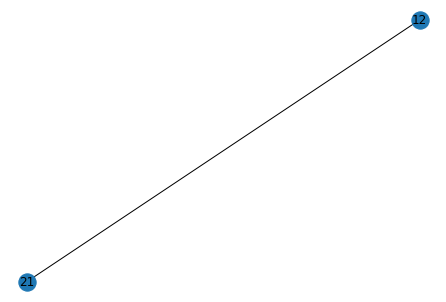

Pancake network for n = 3


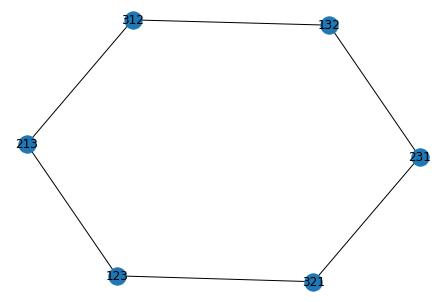

Pancake network for n = 4


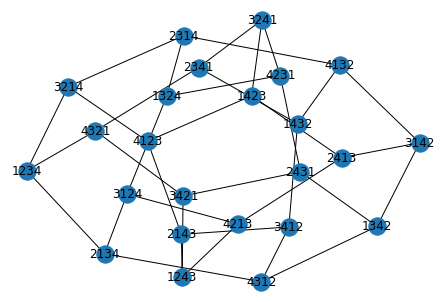

Pancake network for n = 5


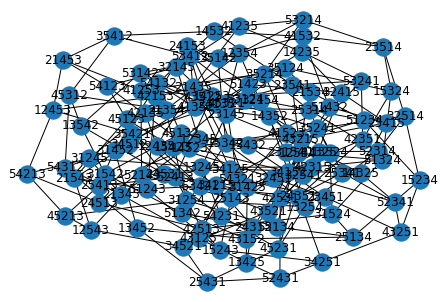

In [64]:
print("Pancake network for n = 2")
plotPancakeNetwork(2)
print("Pancake network for n = 3")
plotPancakeNetwork(3)
print("Pancake network for n = 4")
plotPancakeNetwork(4)
print("Pancake network for n = 5")
plotPancakeNetwork(5)

In [65]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [66]:
def goodLevel(s,L):  
       # Create dictionaries graph,visited and pydot graph G
        if s == sorted(s):
         return True
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]

            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)) and (l < L):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                     node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    return True
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append([d,l+1]) 
                  visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        return False
def smallPancakeNumber(n):
  if n == 1:
    return 0
  max = 1
  num_permuta = m.factorial(n)
  permutacion = list(range(1,n+1))
  permutaciones = list(itertools.permutations(permutacion))
  for i in range(0,num_permuta):
    for j in range(max, 2*n):
      perm = list(permutaciones[i])
      if goodLevel(perm, j):
        max = j
        break
  return max

In [67]:
print("Pancake Number for n = ", 3)
print(smallPancakeNumber(3))
print("Pancake Number for n = ", 4)
print(smallPancakeNumber(4))
print("Pancake Number for n = ", 5)
print(smallPancakeNumber(5))

Pancake Number for n =  3
3
Pancake Number for n =  4
4
Pancake Number for n =  5
5


##**PUNTO 2:**


In [ ]:
def goodLevels(s,L):  
        if s == sorted(s):
         return True
        graph = defaultdict()
        visited = defaultdict()
        queue = [] 
        queue.append([s,0]) 
        visited[lstr(s)] = True
  
        while queue: 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]
            if(s != sorted(s)) and (l < L):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                  if(d == sorted(d)):
                    return True
                  graph[lstr(s)].append(lstr(d))
                  queue.append([d,l+1]) 
                  visited[lstr(d)] = True 
        return False
def simplifiedPancake(n):
  if n == 1:
    return 0
  max = 1
  num_permuta = m.factorial(n)
  permutacion = list(range(1,n+1))
  permutaciones = list(itertools.permutations(permutacion))
  for i in range(0,num_permuta):
    for j in range(max, 2*n):
      perm = list(permutaciones[i])
      if goodLevels(perm, j):
        max = j
        break
  return max

In [ ]:
n = 1
while n <= 25:
  print("The pancake number of", n, " is ",simplifiedPancake(n))
  n = n+1

The pancake number of 1  is  0
The pancake number of 2  is  1
The pancake number of 3  is  3
The pancake number of 4  is  4
The pancake number of 5  is  5
The pancake number of 6  is  7
The pancake number of 7  is  8
The pancake number of 8  is  9


##Biggest p_n calculated was for n = 8, which gave the result p_8 = 9

##**PUNTO 3:**


In [44]:
def twoHandFlip(lis, pos1, pos2): #Realiza un flip a mano cambiada
  l1 = []
  l2 = []
  l3 = []
  if pos1 == pos2:
    return lis
  if pos1 > 1:
    l1 = lis[0:pos1-1]
  if pos2 < len(lis):
    l3 = lis[pos2:]
  l2 = lis[pos1-1:pos2]
  l2 = l2[::-1]
  return l1 + l2 + l3

In [47]:
p = [5,2,3,4,1]
for i in range(1, len(p)):
  for j in range(i+1, len(p)+1):
    print(twoHandFlip(p,i,j))

[2, 5, 3, 4, 1]
[3, 2, 5, 4, 1]
[4, 3, 2, 5, 1]
[1, 4, 3, 2, 5]
[5, 3, 2, 4, 1]
[5, 4, 3, 2, 1]
[5, 1, 4, 3, 2]
[5, 2, 4, 3, 1]
[5, 2, 1, 4, 3]
[5, 2, 3, 1, 4]


In [55]:
def lstr(p):
  return ''.join([str(elem)  for elem in p])
def ModifiedBFSPreSols(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]

            flag = False
            for i in range(1, len(p)):
                for j in range(i+1, len(p)+1):
                 d = twoHandFlip(s, i, j)
                 if(d == sorted(d)):
                  flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(1, len(p)):
                for j in range(i+1, len(p)+1):
                 d = twoHandFlip(s, i, j)
                 if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                     node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

Two Spatulas


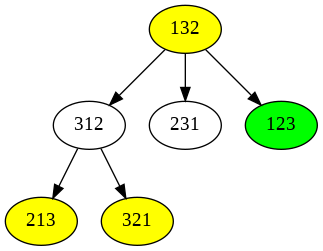

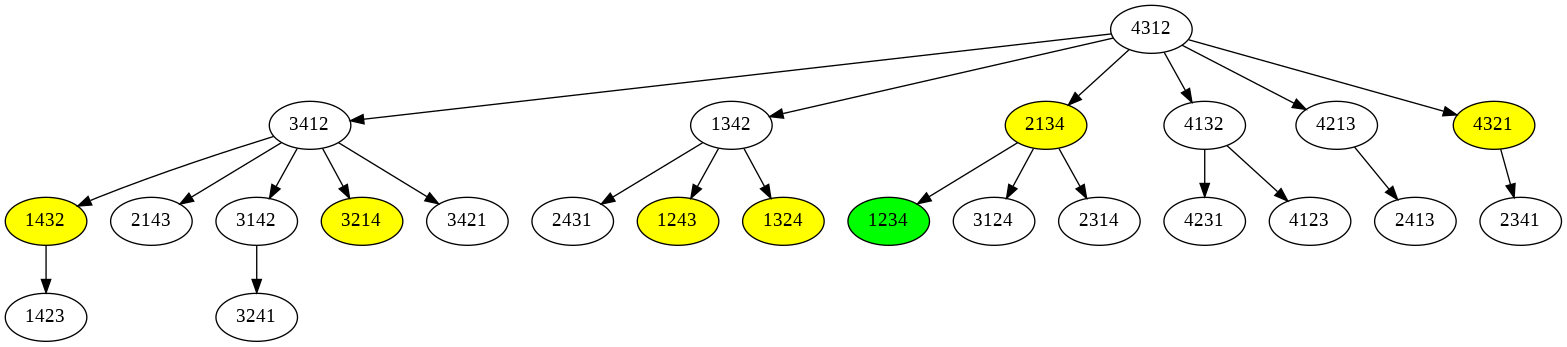

In [61]:
print("Two Spatulas")
p = [1,3,2]
ModifiedBFSPreSols(p)
p = [4,3,1,2]
ModifiedBFSPreSols(p)

In [49]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])
def ModifiedBFSPreSolsLevel(s,L):  
        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
  
        while queue: 
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]

            flag = False
            for i in range(1, len(p)):
              for j in range(i+1, len(p)+1):
                  d = twoHandFlip(s, i, j)
                  if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))
            G.add_node(node)   
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)) and (l < L):
              for i in range(1, len(p)):
                for j in range(i+1, len(p)+1):
                 d = twoHandFlip(s, i, j)
                 if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                     node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append([d,l+1]) 
                  visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

Pancake tree of one level using two Spatulas


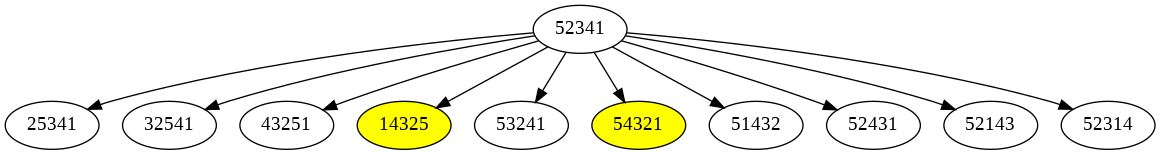

In [52]:
print("Pancake tree of one level using two Spatulas")
p = [5,2,3,4,1]
ModifiedBFSPreSolsLevel(p,1)

Pancake tree of two levels using two Spatulas


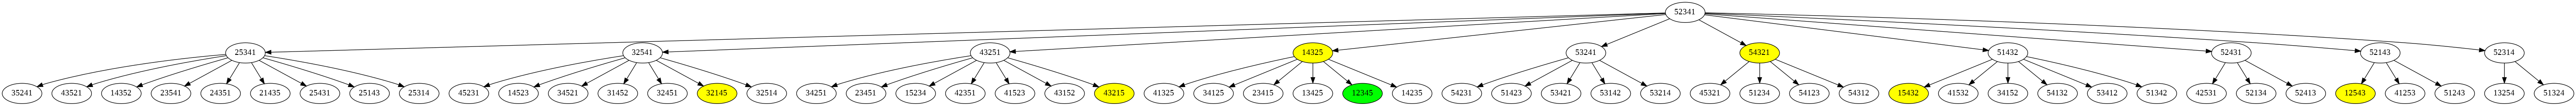

In [53]:
print("Pancake tree of two levels using two Spatulas")
p = [5,2,3,4,1]
ModifiedBFSPreSolsLevel(p,2)

## References

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/


